# Ejercicio Guiado de Análisis de Datos y Modelado en Machine Learning

Este ejercicio tiene como objetivo fortalecer tu capacidad para comprender un dataset, seleccionar un modelo adecuado y analizar los resultados mediante visualizaciones.

El ejercicio se divide en tres partes:

1. Análisis del dataset  
2. Selección y justificación del modelo de Machine Learning  
3. Visualización y análisis de resultados  

---

## Planteamiento del Problema

Una empresa de telecomunicaciones desea construir un modelo que permita **predecir si un cliente cancelará su servicio (Churn)** en el próximo mes. Cuentas con un dataset con información demográfica y de comportamiento del cliente. Tu objetivo es comprender los datos, elegir un modelo adecuado y generar visualizaciones que expliquen los patrones encontrados.

**Dataset para este ejercicio:**  
https://www.kaggle.com/datasets/blastchar/telco-customer-churn/data

Este dataset contiene información real sobre clientes de telecomunicaciones y su estado de churn.

---

# PARTE 1 — Análisis del Dataset

Antes de entrenar un modelo, debes analizar en profundidad las características del dataset.

Responde las siguientes cinco preguntas obligatorias basadas estrictamente en la información contenida en el archivo.

---

## Preguntas de comprensión del dataset

### 1. ¿Qué tipo de problema de Machine Learning es este?

- Explica si se trata de un problema supervisado o no supervisado.  
- Justifica si el dataset incluye una variable objetivo clara.

---

### 2. Identificación de la variable objetivo (si aplica)

Si consideras el problema supervisado:
- Identifica la variable objetivo del dataset.  
- Determina si estamos frente a una tarea de clasificación o de regresión.

Si deseas considerarlo también como problema no supervisado:
- Menciona qué patrones podrían agruparse o explorarse.

---

In [32]:
# Comprensión del dataset
import pandas as pd
import numpy as np 

# Cargar el dataset desde un archivo CSV
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.xls')

# Mostrar las primeras filas del dataset
print(data.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [33]:
# Nombres de las columnas
print(data.columns)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [34]:
# Si identificas una columna que podría ser el target
target_column = 'Churn'  # reemplaza con el nombre real

if target_column in data.columns:
    print(f"\nAnálisis de la variable objetivo '{target_column}':")
    print(f"Tipo de datos: {data[target_column].dtype}")
    print(f"Valores únicos: {data[target_column].unique()}")
    print(f"Distribución:\n{data[target_column].value_counts()}")


Análisis de la variable objetivo 'Churn':
Tipo de datos: object
Valores únicos: ['No' 'Yes']
Distribución:
Churn
No     5174
Yes    1869
Name: count, dtype: int64


Se trata de un problema supervisado, ya que, claramente se puede identificar una variable objetivo: ```Churn```. Esta es una varible categórica (Yes/No). Por lo mismo, estamos frente a un problema de clasificación. 

### 3. Clasificación de las variables del dataset

Para cada columna, explica:
- Si es una variable numérica continua o discreta.  
- Si es categórica nominal o categórica ordinal.  
- Por qué pertenece a ese tipo de variable.

In [35]:
# Identificar el tipo de variable en el problema

# Convertir a numérico las columnas que deberían ser numéricas
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

# Identificar el tipo de variable en el dataset
for column in data.columns:
    if column == target_column or column == 'customerID':
        continue  # Saltar la variable objetivo y el ID del cliente

    if data[column].dtype == 'object':
        print(f"\nLa columna '{column}' es categórica.")
        print(f"Valores únicos: {data[column].unique()}")
    else:
        print(f"\nLa columna '{column}' es numérica.")


La columna 'gender' es categórica.
Valores únicos: ['Female' 'Male']

La columna 'SeniorCitizen' es numérica.

La columna 'Partner' es categórica.
Valores únicos: ['Yes' 'No']

La columna 'Dependents' es categórica.
Valores únicos: ['No' 'Yes']

La columna 'tenure' es numérica.

La columna 'PhoneService' es categórica.
Valores únicos: ['No' 'Yes']

La columna 'MultipleLines' es categórica.
Valores únicos: ['No phone service' 'No' 'Yes']

La columna 'InternetService' es categórica.
Valores únicos: ['DSL' 'Fiber optic' 'No']

La columna 'OnlineSecurity' es categórica.
Valores únicos: ['No' 'Yes' 'No internet service']

La columna 'OnlineBackup' es categórica.
Valores únicos: ['Yes' 'No' 'No internet service']

La columna 'DeviceProtection' es categórica.
Valores únicos: ['No' 'Yes' 'No internet service']

La columna 'TechSupport' es categórica.
Valores únicos: ['No' 'Yes' 'No internet service']

La columna 'StreamingTV' es categórica.
Valores únicos: ['No' 'Yes' 'No internet service']



---

### 4. Distribución de las variables numéricas

Analiza:
- Si existen valores atípicos que puedan afectar el modelo.  
- Si la distribución es simétrica o presenta sesgo.  
- Si las variables presentan dispersión amplia o concentrada.

---

In [36]:
# Valores nulos
print("Valores nulos:")
print(data.isnull().sum())
print("\nTotal de nulos:", data.isnull().sum().sum())

Valores nulos:
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Total de nulos: 11


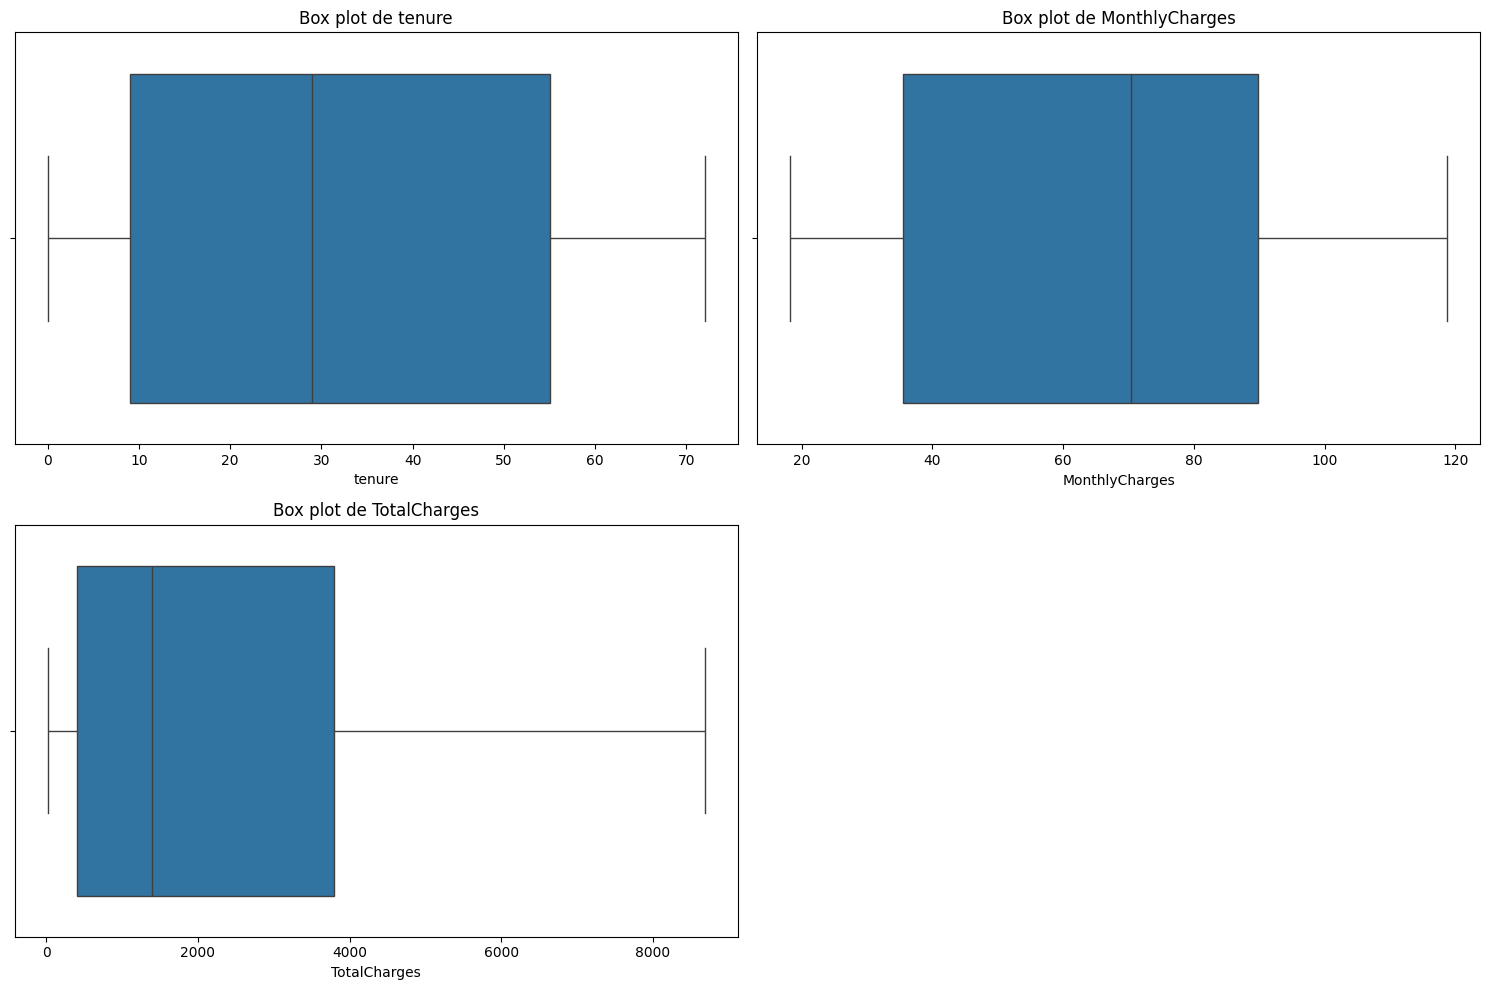

In [37]:
import matplotlib.pyplot as plt

# Distribución de las variables numéricas
plt.figure(figsize=(15, 10))
for i, col in enumerate(['tenure', 'MonthlyCharges', 'TotalCharges']):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x=data[col])
    plt.title(f'Box plot de {col}')
plt.tight_layout()
plt.show()

### 5. Relación entre variables

Describe:
- Qué variables podrían tener impacto en la probabilidad de churn.  
- Si existen correlaciones fuertes entre variables numéricas.  
- Qué hipótesis pueden formarse sobre el comportamiento del cliente.

---

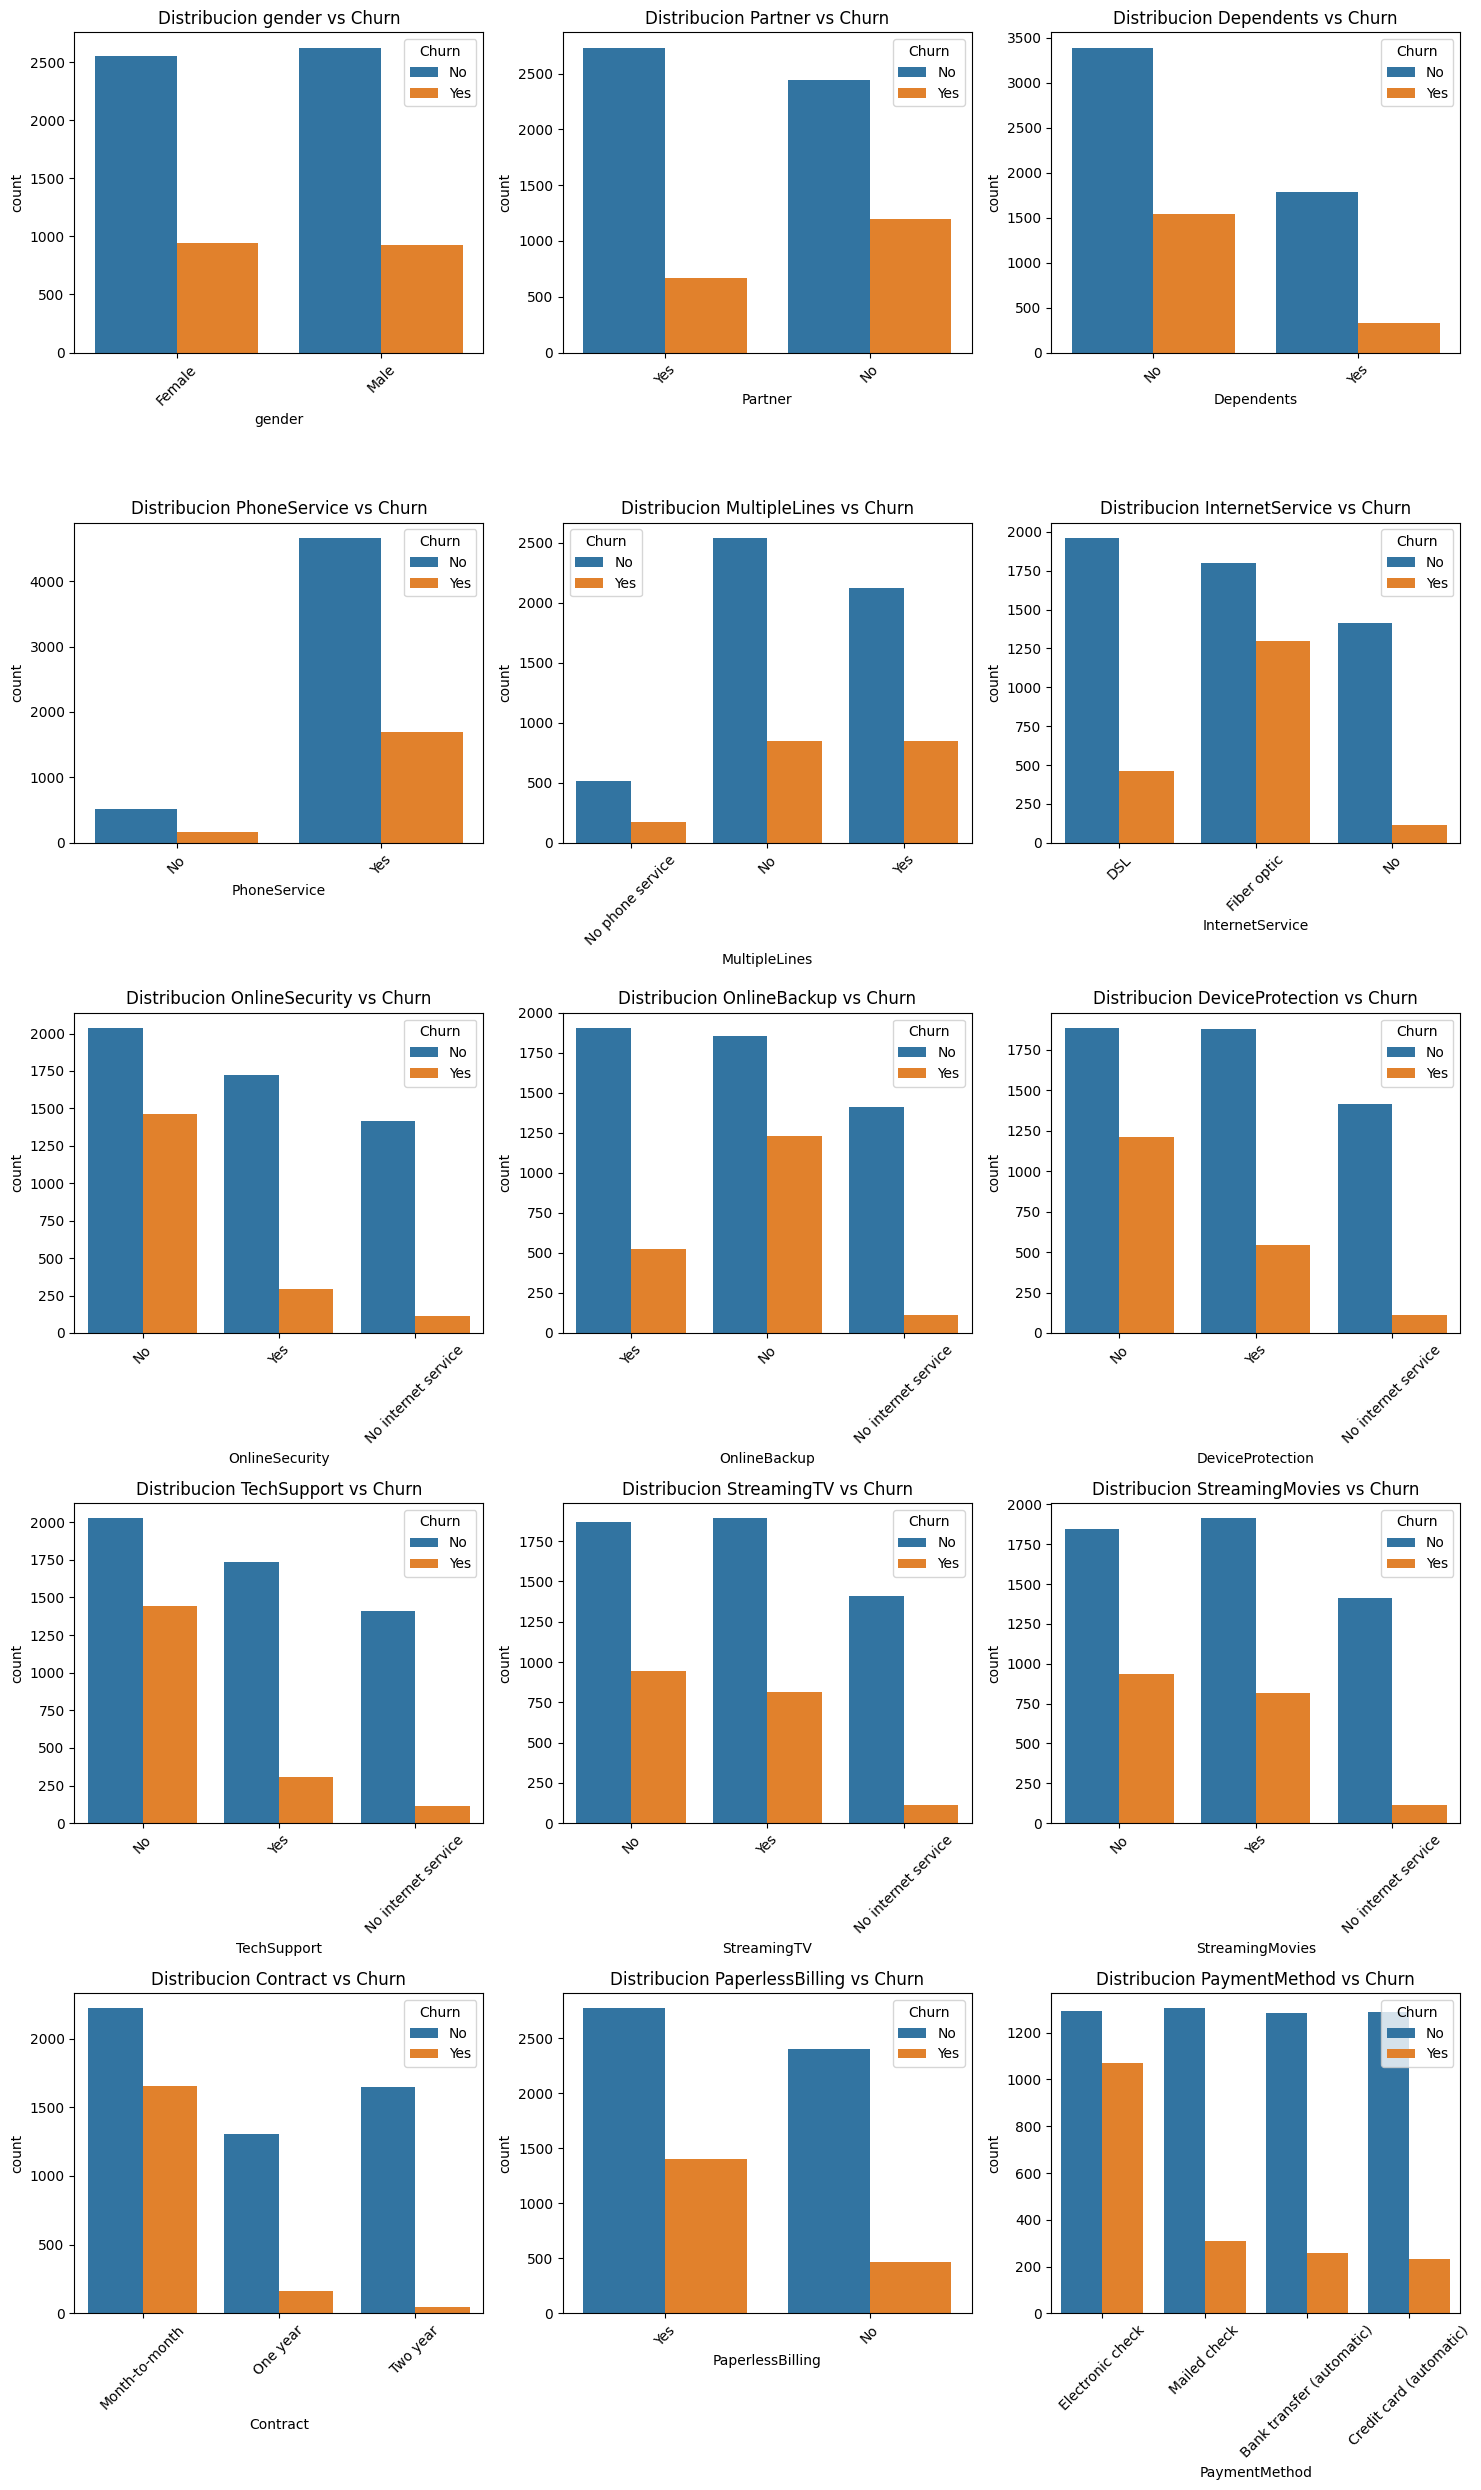

In [38]:
import seaborn as sns
categorical_cols=data.select_dtypes(include="object").columns.tolist()
categorical_cols.remove('customerID')
categorical_cols.remove('Churn')

n_cols=3
n_rows=(len(categorical_cols)+n_cols-1)//n_cols

fig,axes= plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
axes=axes.flatten()

for i, col in enumerate(categorical_cols):
    sns.countplot(data=data,x=col,hue="Churn",ax=axes[i])
    axes[i].set_title(f'Distribucion {col} vs Churn')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].legend(title='Churn')
plt.tight_layout()
plt.show()

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn_numeric
SeniorCitizen,1.000000,0.016567,0.220173,0.103006,0.150889
tenure,0.016567,1.000000,0.247900,0.826178,-0.352229
MonthlyCharges,0.220173,0.247900,1.000000,0.651174,0.193356
TotalCharges,0.103006,0.826178,0.651174,1.000000,-0.198324
Churn_numeric,0.150889,-0.352229,0.193356,-0.198324,1.000000


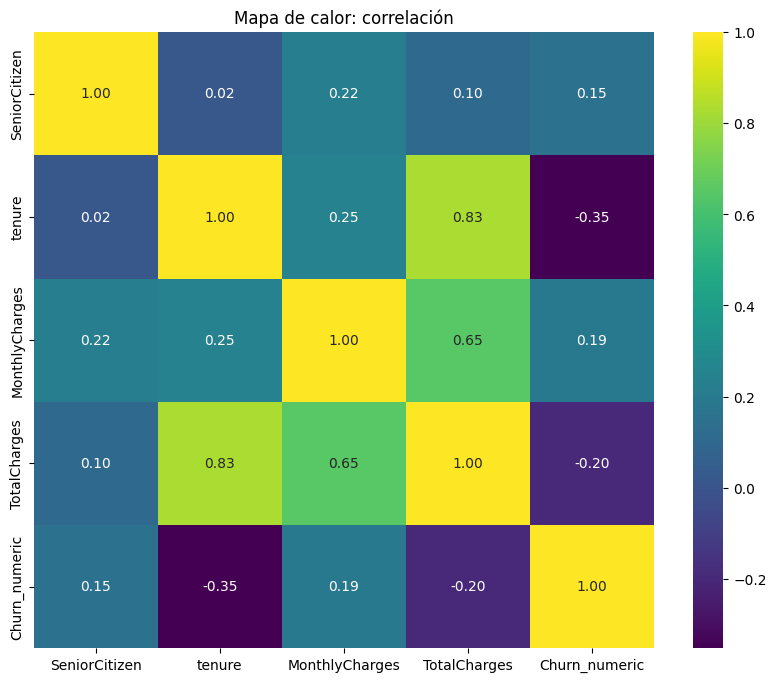

In [47]:
numerical_cols = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
print(numerical_cols)

# Convertir la columna 'Churn' a numerica (0 para 'No', 1 para 'Yes')
data['Churn_numeric'] = data['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

numerical_data = data[numerical_cols + ['Churn_numeric']]

# matrix de correlacion
matrix_corr = numerical_data.corr()

# Display the correlation matrix
display(matrix_corr)

# Generate a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(matrix_corr, annot=True, cmap='viridis', fmt=".2f")
plt.title('Mapa de calor: correlación')
plt.show()

# PARTE 2 — Selección del Modelo de Machine Learning



En función de tu análisis previo, selecciona uno de los modelos propuestos y justifica tu decisión.



Debes explicar por qué el modelo es adecuado considerando el tipo de variable objetivo, el tamaño del dataset y la naturaleza de las variables.



---



## Modelos disponibles para elegir y razones para utilizarlos



### 1. Regresión Logística



Apropiada cuando:

- La variable objetivo es binaria (churn o no churn).  

- Se requiere interpretar el impacto de las características en la probabilidad de cancelar el servicio.  

- Se desea un modelo simple y eficiente.



---



### 2. Árbol de Decisión



Recomendado cuando:

- Existen relaciones no lineales entre variables.  

- Se necesita un modelo que genere reglas claras y comprensibles.  

- El dataset incluye tanto variables numéricas como categóricas.



---



### 3. Random Forest



Útil cuando:

- El dataset es complejo o contiene ruido.  

- Se busca mayor precisión que un único árbol.  

- Se desea evitar sobreajuste usando múltiples árboles.



---

In [ ]:
# Usar Radom forest como modelo
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
# Limpieza inicial

# Rellenar valores nulos en TotalCharges (clientes nuevos) con 0
data['TotalCharges'] = data['TotalCharges'].fillna(0)

# Eliminar customerID si existe
if 'customerID' in data.columns:
    data.drop('customerID', axis=1, inplace=True)

# Verificar valores nulos
print("Valores nulos:")
print(data.isnull().sum())


Valores nulos:
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
Churn_numeric       0
dtype: int64


In [50]:
# Variables NUMÉRICAS
numeric_vars = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

# Variables CATEGÓRICAS NOMINALES
nominal_vars = [
    'gender', 'Partner', 'Dependents', 'PhoneService', 
    'PaperlessBilling', 'PaymentMethod'
]

# Variables CATEGÓRICAS ORDINALES
ordinal_vars = ['Contract']  # Month-to-month < One year < Two year

# Variables con categorías "No service"
service_vars = [
    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'
]

# Variable objetivo
target_var = 'Churn'

In [54]:

# Codificación de variables ORDINALES
contract_mapping = {'Month-to-month': 0, 'One year': 1, 'Two year': 2}
data['Contract'] = data['Contract'].map(contract_mapping)

# Codificación de variables NOMINALES con One-Hot Encoding
nominal_to_encode = nominal_vars + service_vars
df_encoded = pd.get_dummies(data, columns=nominal_to_encode, drop_first=True)

# Codificación de la variable objetivo
le = LabelEncoder()
df_encoded['Churn'] = le.fit_transform(df_encoded['Churn'])  # Yes=1, No=0

print(f"Nuevas dimensiones: {df_encoded.shape}")

Nuevas dimensiones: (7043, 31)


In [55]:
# Separar características y variable objetivo
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

# División train/test (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42,
    stratify=y  # Mantener proporción de churn
)

print(f"Conjunto de entrenamiento: {X_train.shape}")
print(f"Conjunto de prueba: {X_test.shape}")
# print(f"Proporción de Churn - Train: {y_train.mean():.3f}, Test: {y_test.mean():.3f}")

Conjunto de entrenamiento: (5634, 30)
Conjunto de prueba: (1409, 30)


In [63]:
# Modelo Random Forest base
rf_base = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1  # Usar todos los cores
)

# Entrenamiento
rf_base.fit(X_train, y_train)

# Predicciones
y_pred_base = rf_base.predict(X_test)

# Evaluación base
print("Random Forest Base:")
print(f"Accuracy: {rf_base.score(X_test, y_test):.5f}")
print(f"AUC-ROC: {roc_auc_score(y_test, y_pred_base):.5f}")

# Reporte de clasificación
print("\nReporte de Clasificación - Random Forest Base:")
print(classification_report(y_test, y_pred_base, target_names=['No Churn', 'Churn']))

Random Forest Base:
Accuracy: 1.00000
AUC-ROC: 1.00000

Reporte de Clasificación - Random Forest Base:
              precision    recall  f1-score   support

    No Churn       1.00      1.00      1.00      1035
       Churn       1.00      1.00      1.00       374

    accuracy                           1.00      1409
   macro avg       1.00      1.00      1.00      1409
weighted avg       1.00      1.00      1.00      1409



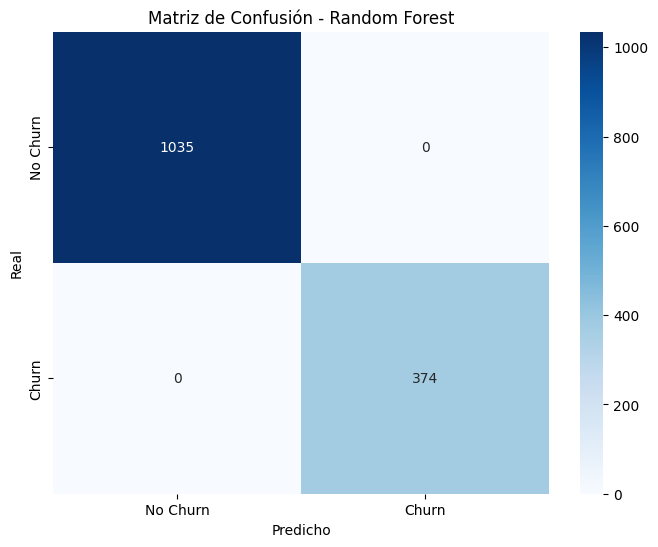

In [64]:
# Matriz de confusión
cm = confusion_matrix(y_test, y_pred_base)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Churn', 'Churn'],
            yticklabels=['No Churn', 'Churn'])
plt.title('Matriz de Confusión - Random Forest')
plt.ylabel('Real')
plt.xlabel('Predicho')
plt.show()

# PARTE 3 — Visualización y Análisis de Resultados



Debes generar visualizaciones que respalden tu análisis y permitan interpretar los patrones encontrados.



Incluye una justificación para cada gráfica que utilices.



---



## Gráficas sugeridas y su propósito



### 1. Histogramas



- Útiles para ver distribuciones de variables como duración del servicio o cargos mensuales.  

- Permiten identificar valores extremos o sesgos.



---



### 2. Gráficas de barras



- Ideales para analizar variables categóricas como tipo de contrato o método de pago.  

- Permiten observar diferencias importantes entre grupos.



---



### 3. Mapa de calor de correlación



- Ayuda a identificar relaciones entre variables numéricas como cargos mensuales y cargos totales.  

- Útil para ver redundancia o multicolinealidad.



---



### 4. Matriz de confusión



- Permite evaluar qué tan bien clasifica el modelo los casos de churn y no churn.  

- Indica aciertos, falsos positivos y falsos negativos.



---



### 5. Curva ROC



- Evalúa la capacidad del modelo para discriminar correctamente entre clientes que se van y los que permanecen.  

- Permite comparar modelos.



---



### 6. Gráficos de dispersión



- Muestran relaciones entre pares de variables numéricas.  

- Útiles para detectar patrones o segmentos de clientes.



---



# Resultados esperados



1. Respuestas completas a las cinco preguntas del análisis del dataset.  

2. Justificación formal del modelo seleccionado.  

3. Gráficas correctamente generadas y explicadas.  

4. Conclusión general del análisis, los patrones encontrados y el desempeño del modelo.
